<a href="https://colab.research.google.com/github/eskutza/AnalisisPredictivo/blob/main/colab/RandomForestClassifier_Clasificacion_Tarea_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

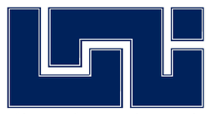

</center>

<h1><b>
Dirección de Estudios de Posgrado y Educación Continua
<h2><b>
Analítica Predictiva y Machine Learning con R, Python y Databricks

[UNI-DEPEC](https://posgrado.uni.edu.ni)

~~~Python
Iranzuegi López, Luis Ángel
~~~

# **Tarea Modelos Supervisados**

# **Modelo de Clasificación**: <font color="#f89938"><h10>**scikit learn** <font> 

# **Carga de librerías necesarias**

## <font color="#333F49"> **Para el análisis de datos y el conjunto de datos** <font>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install pycaret

## <font color="#333F49">**Para el preprocesado y modelado** <font>


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

## <font color="#333F49">**Para los gráficos** <font>

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

## <font color="#333F49">**Para serializar: grabar y recuperar los modelos entrenados** <font>

In [ ]:
import pickle 
import os

## <font color="#333F49">**Para las alertas** <font>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#**Análisis Exploratorio de los Datos y Preprocesamiento de Datos**

## <font color="#333F49">**Descripción del set de datos** <font>

Los $datos^1$ están relacionados con campañas de marketing directo de una institución bancaria portuguesa.

Las campañas de marketing se han basado en llamadas telefónicas. A menudo, ha sido necesario más de un contacto con el mismo cliente, clienta para poder detectar si estaba (o no) interesado en la contratación  de un producto (depósito a plazo bancario).

<font color="#666666">
<h10>
 (1) Fuente: S. Moro, R. Laureano y P. Cortez. Uso de la minería de datos para el marketing directo bancario: una aplicación de la metodología CRISP-DM
</font>

[Uso de la minería de datos para el marketing directo bancario]( http://repositorium.sdum.uminho.pt/handle/1822/14838)



**Objetivo:** 

Definir un modelo que pueda explicar el éxito de un contacto, es decir, si el o la clienta suscribe el depósito. 

Aumentar la eficacia de la campaña al identificar las principales características que afectan al éxito, ayudando a una mejor gestión de los recursos disponibles (por ejemplo, el esfuerzo humano en llamadas telefónicas, tiempo) y la selección de un conjunto de clientes, clientas potenciales
compradoras.



El dataframe contiene 17 variables y 45211 observaciones.

Las variables se definen como:
- **age:** Edad de los y las clientas; variable numérica
- **job:** Corresponde al tipo de trabajo de los y las clientas; variable categórica
- **marital:** Estado civil de los y las clientas; variable categórica. A tener en cuenta, divorciado, divorciada recoge también las opciones de viudo o viuda
- **education:** Nivel de estudios que han alcanzado los y las clientas; variable categórica. A tener en cuenta que uno de los valores de esta variable es <font color="#0A66C2"><h10>"desconocido"<font> 


- **default:** Si el o la clienta tiene algún no o está al corriente de sus comprosimos creditíceos con la entidad; variable dicotómica
- **balance:** saldo anual medio en euros: variable numérica
- **housing:** Si el o la clienta tiene algún crédito hipotecario con la entidad; variable dicotómica
- **loan:** Si el o la clienta tiene algún crédito consumo con la entidad; variable dicotómica
- **contact:** Tipo de contacto; variable categórica. A tener en cuenta que uno de los valores de esta variable es <font color="#0A66C2"><h10>"desconocido"<font> 


- **day:** Último día de contacto del mes; varible numérica
- **month:** Último mes de contacto del año; varible categórica
- **duration:** Duración del último contacto en segundos; variable numérica
- **campaign:** Número de contactos realizados durante la campaña para cada cliente, clienta; variable numérica
- **pdays:** Número de días que pasaron después de que el o la clienta fue contactado por última vez desde una campaña anterior; variable numérica. A tener en cuenta, un valor de -1 significa que el cliente fue no contactado previamente
- **previous:** Número de contactos realizados antes de esta campaña y para este cliente, clienta; variable numérica
- **poutcome:** Resultado de la campaña de marketing anterior; variable categórica. A tener en cuenta que uno de los valores de esta variable es <font color="#0A66C2"><h10>"desconocido"<font> 


- **y:** ¿El o la clienta ha suscrito un depósito a plazo? <font color="#0A66C2"><h10>"**nuestra variable objetivo o variable respuesta**"<font> 

In [ ]:
url = "https://raw.githubusercontent.com/eskutza/AnalisisPredictivo/main/Datasets/bank-full.csv"

In [ ]:
df = pd.read_csv(url, sep =';')
df


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
df.index

RangeIndex(start=0, stop=45211, step=1)

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
df.shape

(45211, 17)

In [ ]:
df.size

768587

## <font color="#333F49">**Valores únicos por variable** <font>

In [ ]:
df.nunique() 

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.age.unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

In [ ]:
df.age.value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64

In [ ]:
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
df.job.value_counts() # 288 observaciones con una valor de "unknown"

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
df.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [ ]:
df.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
df.education.value_counts() # 1857 observaciones con una valor de "unknown"

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [ ]:
df.default.unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df.default.value_counts() # Un 2% de las observaciones en esta variable arroja un valor de si

no     44396
yes      815
Name: default, dtype: int64

In [ ]:
df.balance.unique()

array([ 2143,    29,     2, ...,  8205, 14204, 16353])

In [ ]:
df.balance.value_counts()

0        3514
1         195
2         156
4         139
3         134
         ... 
4305        1
6352        1
18881       1
14889       1
7218        1
Name: balance, Length: 7168, dtype: int64

In [ ]:
df.housing.unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df.housing.value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [ ]:
df.loan.unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [ ]:
df.contact.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [ ]:
df.contact.value_counts() # 13020 observaciones con una valor de "unknown"

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [ ]:
df.day.unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

In [ ]:
df.day.value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [ ]:
df.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [ ]:
df.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [ ]:
df.duration.unique()

array([ 261,  151,   76, ..., 1298, 1246, 1556])

In [ ]:
df.duration.value_counts()

124     188
90      184
89      177
122     175
104     175
       ... 
2150      1
1970      1
1906      1
1842      1
2015      1
Name: duration, Length: 1573, dtype: int64

In [ ]:
df.campaign.unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [ ]:
df.campaign.value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
25       22
24       20
28       16
29       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
41        2
50        2
37        2
51        1
55        1
46        1
58        1
44        1
39        1
63        1
Name: campaign, dtype: int64

In [ ]:
df.pdays.unique()

array([ -1, 151, 166,  91,  86, 143, 147,  89, 140, 176, 101, 174, 170,
       167, 195, 165, 129, 188, 196, 172, 118, 119, 104, 171, 117, 164,
       132, 131, 123, 159, 186, 111, 115, 116, 173, 178, 110, 152,  96,
       103, 150, 175, 193, 181, 185, 154, 145, 138, 126, 180, 109, 158,
       168,  97, 182, 127, 130, 194, 125, 105, 102,  26, 179,  28, 183,
       155, 112, 120, 137, 124, 187, 190, 113, 162, 134, 169, 189,   8,
       144, 191, 184, 177,   5,  99, 133,  93,  92,  10, 100, 156, 198,
       106, 153, 146, 128,   7, 121, 160, 107,  90,  27, 197, 136, 139,
       122, 157, 149, 135,  30, 114,  98, 192, 163,  34,  95, 141,  31,
       199,  94, 108,  29, 268, 247, 253, 226, 244, 239, 245, 204, 231,
       238, 258, 230, 254, 265,  71, 223, 246, 250, 266, 240, 205, 261,
       259, 241, 260, 234, 251, 225, 161, 237, 262, 248, 255, 220, 227,
       206, 224, 249, 235, 228, 263,   2, 270, 232, 252, 207, 200, 269,
       233, 256, 273, 272, 242, 264, 208, 214, 222, 271, 203, 22

In [ ]:
df.pdays.value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

In [ ]:
df.previous.unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41])

In [ ]:
df.previous.value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64

In [ ]:
df.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [ ]:
df.poutcome.value_counts() # 82% de las observaciones con una valor de "unknown"

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [ ]:
df.y.unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [ ]:
df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


Si alguno de los niveles de una **variable cualitativa** tiene **muy pocas observaciones** en comparación a los otros niveles, puede ocurrir que, durante la validación cruzada, algunas particiones no contengan ninguna observación de dicha clase (varianza cero), lo que puede dar lugar a errores. 

**Estrategias posibles**:
- Eliminar las observaciones del grupo minoritario si es una variable multiclase.
- Eliminar la variable si solo tiene dos niveles.
- Agrupar los niveles minoritarios en un único grupo.
- Asegurar que, en la creación de las particiones, todos los grupos estén representados en cada una de ellas.

Para este caso, hay que tener precaución con la variable <font color="#0A66C2"><h10> **default**. En concreto, tan solo un 2% de las observaciones de esta variable arroja un valor de si, siendo no el 98% restante. <font>

## <font color="#333F49">**Reemplazar "unknown"** <font>


In [ ]:
df.replace({'unknown': None}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.isnull().sum().sort_values(ascending=False)

poutcome     36959
contact      13020
education     1857
job            288
loan             0
marital          0
default          0
balance          0
housing          0
y                0
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
age              0
dtype: int64

## <font color="#333F49">**Codificación** <font>


### Variables categóricas de tipo ordinal <font color="#0A66C2"><h10>**(job)** <font>

Desconocemos el orden de esta variable, pero es evidente que cara a la compresión, se establecerá una lógica de mayor a menor poder adquisitivo, basado en el salario medio que percibe cada tipo de trabajo definido.

Podemos establecer como criterio de ordenación, el tipo de trabajo en función del balance. A mayor balance, mayor interés para la entidad financiera, mayores recursos disponibles por parte de los y las clientas.

In [ ]:
df1 = df.copy(deep=False)

In [ ]:
df1.groupby(by = 'job', as_index = False).mean().sort_values(by ='balance',ascending=False)

,job,age,balance,day,duration,campaign,pdays,previous
5,retired,61.626767,1984.215106,15.439488,287.361307,2.346731,37.443905,0.638693
4,management,40.449567,1763.616832,16.114189,253.995771,2.864348,38.665468,0.668006
6,self-employed,40.484484,1647.970868,16.027866,268.157061,2.853072,34.747308,0.551615
10,unemployed,40.961627,1521.745971,15.498081,288.543361,2.432080,34.146585,0.466616
2,entrepreneur,42.190989,1521.470074,15.702085,256.309348,2.799597,32.486214,0.478144
3,housemaid,46.415323,1392.395161,16.002419,245.825000,2.820968,21.505645,0.371774
8,student,26.542644,1388.060768,14.897655,246.656716,2.299574,57.041578,0.953092
9,technician,39.314598,1252.632092,16.408582,252.904962,2.906805,37.195077,0.574569
0,admin.,39.289886,1135.838909,15.564301,246.896732,2.575324,47.859021,0.671630
1,blue-collar,40.044081,1078.826654,15.442561,262.901562,2.816995,44.033498,0.505138


Con esta primera aproximación, se decide aplicar una corrección en el orden de los tipos de ocupación recogidos en aquellas tipologías que no impliquen actividad ocupacional (student, unemployed)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
encoder = OrdinalEncoder(categories=[[None,'unemployed', 'student', 'housemaid',
                                      'services','blue-collar','admin.',
                                      'technician','entrepreneur',  
                                      'self-employed', 'management','retired']],
                         dtype = np.int64)

In [ ]:
encoder.fit(df1[['job']])
df1.insert(2, column ='job_encoded', 
           value = encoder.transform(df[['job']]))


In [ ]:
df1

,age,job,job_encoded,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,10,married,tertiary,no,2143,yes,no,None,5,may,261,1,-1,0,None,no
1,44,technician,7,single,secondary,no,29,yes,no,None,5,may,151,1,-1,0,None,no
2,33,entrepreneur,8,married,secondary,no,2,yes,yes,None,5,may,76,1,-1,0,None,no
3,47,blue-collar,5,married,None,no,1506,yes,no,None,5,may,92,1,-1,0,None,no
4,33,None,0,single,None,no,1,no,no,None,5,may,198,1,-1,0,None,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,7,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,None,yes
45207,71,retired,11,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,None,yes
45208,72,retired,11,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,5,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,None,no


In [ ]:
df1.job.value_counts(dropna= False)

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
NaN               288
Name: job, dtype: int64

In [ ]:
df1.job_encoded.value_counts()

5     9732
10    9458
7     7597
6     5171
4     4154
11    2264
9     1579
8     1487
1     1303
3     1240
2      938
0      288
Name: job_encoded, dtype: int64

### Variables categóricas de tipo ordinal <font color="#0A66C2"><h10>**(education)** <font>

In [ ]:
encoder2 = OrdinalEncoder(categories=[[None,'primary', 'secondary', 'tertiary']],
                         dtype = np.int64)

In [ ]:
encoder2.fit(df1[['education']])
df1.insert(5, column ='education_encoded', 
           value = encoder2.transform(df[['education']]))

In [ ]:
df1

,age,job,job_encoded,marital,education,education_encoded,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,10,married,tertiary,3,no,2143,yes,no,None,5,may,261,1,-1,0,None,no
1,44,technician,7,single,secondary,2,no,29,yes,no,None,5,may,151,1,-1,0,None,no
2,33,entrepreneur,8,married,secondary,2,no,2,yes,yes,None,5,may,76,1,-1,0,None,no
3,47,blue-collar,5,married,None,0,no,1506,yes,no,None,5,may,92,1,-1,0,None,no
4,33,None,0,single,None,0,no,1,no,no,None,5,may,198,1,-1,0,None,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,7,married,tertiary,3,no,825,no,no,cellular,17,nov,977,3,-1,0,None,yes
45207,71,retired,11,divorced,primary,1,no,1729,no,no,cellular,17,nov,456,2,-1,0,None,yes
45208,72,retired,11,married,secondary,2,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,5,married,secondary,2,no,668,no,no,telephone,17,nov,508,4,-1,0,None,no


In [ ]:
df1.education.value_counts(dropna=False)

secondary    23202
tertiary     13301
primary       6851
NaN           1857
Name: education, dtype: int64

In [ ]:
df1.education_encoded.value_counts(dropna = False)

2    23202
3    13301
1     6851
0     1857
Name: education_encoded, dtype: int64

### Variable categórica <font color="#0A66C2"><h10>**(contact)** <font>

El objetivo de implementar un modelo de aprendizaje supervisado de **clasificación** es predecir el éxito de un contacto, es decir, si el o la clienta suscribe el depósito. Por lo tanto, podemos concluir que todos los y las clientas del set datos han sido contactados por la entidad financiera. 

En este sentido, a modo de conclusión incial, teniendo en cuenta el número de observaciones que no cuentan con tipo de contacto asignado, sería conveniente cara a futuras campañas chequear cómo se recoge este aspecto, pudiendo abrir otras altenativas de canales telemáticos, presenciales (oficina), etc...

Es por ello, que consideramos o, mejor dicho, codificaremos esas observaciones que vienen marcadas con un "unknown" en esta variable como otros canales de contacto (others)

In [ ]:
df1['contact'].replace({None: 'others'}, inplace = True)

In [ ]:
df1['contact'].value_counts()

cellular     29285
others       13020
telephone     2906
Name: contact, dtype: int64

### Variables categóricas a numéricas <font color="#0A66C2"><h10>**(LabelEncoder)** <font>

Convertiremos a string las columnas necesarias para poder aplicar LabelEncoder( ).

Las variables categóricas sobre las que implementaremos la codificación:

- **default**
- **housing**
- **loan**
- **y** <font color="#0A66C2"><h10> **(varibale objetivo)** <font>

In [ ]:
df1.default = df1.default.apply(str)
df1.housing = df1.housing.apply(str)
df1.loan = df1.loan.apply(str)
df1.y = df1.y.apply(str)

In [ ]:
df1

,age,job,job_encoded,marital,education,education_encoded,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,10,married,tertiary,3,no,2143,yes,no,others,5,may,261,1,-1,0,None,no
1,44,technician,7,single,secondary,2,no,29,yes,no,others,5,may,151,1,-1,0,None,no
2,33,entrepreneur,8,married,secondary,2,no,2,yes,yes,others,5,may,76,1,-1,0,None,no
3,47,blue-collar,5,married,None,0,no,1506,yes,no,others,5,may,92,1,-1,0,None,no
4,33,None,0,single,None,0,no,1,no,no,others,5,may,198,1,-1,0,None,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,7,married,tertiary,3,no,825,no,no,cellular,17,nov,977,3,-1,0,None,yes
45207,71,retired,11,divorced,primary,1,no,1729,no,no,cellular,17,nov,456,2,-1,0,None,yes
45208,72,retired,11,married,secondary,2,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,5,married,secondary,2,no,668,no,no,telephone,17,nov,508,4,-1,0,None,no


In [ ]:
import sklearn 
from sklearn.preprocessing import LabelEncoder

In [ ]:
convertir = LabelEncoder()

In [ ]:
df1.insert(7,column='numdefault',value=convertir.fit_transform(df1.default))
df1.insert(10,column='numhousing',value=convertir.fit_transform(df1.housing))
df1.insert(12,column='numloan',value=convertir.fit_transform(df1.loan))
df1.insert(22,column='numy',value=convertir.fit_transform(df1.y))

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                45211 non-null  int64 
 1   job                44923 non-null  object
 2   job_encoded        45211 non-null  int64 
 3   marital            45211 non-null  object
 4   education          43354 non-null  object
 5   education_encoded  45211 non-null  int64 
 6   default            45211 non-null  object
 7   numdefault         45211 non-null  int64 
 8   balance            45211 non-null  int64 
 9   housing            45211 non-null  object
 10  numhousing         45211 non-null  int64 
 11  loan               45211 non-null  object
 12  numloan            45211 non-null  int64 
 13  contact            45211 non-null  object
 14  day                45211 non-null  int64 
 15  month              45211 non-null  object
 16  duration           45211 non-null  int64

## <font color="#333F49"> **Imputaciones (el vecino más cercano)** <font>

In [ ]:
!pip install missingpy

In [ ]:
from missingpy import KNNImputer

In [ ]:
imputacion = KNNImputer(n_neighbors=2, missing_values=0, weights='uniform')

### Imputación de NaN de la variable job (n=288)

In [ ]:
df1.job_encoded = imputacion.fit_transform(df1[['job_encoded']])

In [ ]:
df1.job_encoded.value_counts()

5.000000     9732
10.000000    9458
7.000000     7597
6.000000     5171
4.000000     4154
11.000000    2264
9.000000     1579
8.000000     1487
1.000000     1303
3.000000     1240
2.000000      938
6.721969      288
Name: job_encoded, dtype: int64

In [ ]:
df1['job'][(df1['job_encoded']>6) & 
           (df1['job_encoded']<7)]='technician'

In [ ]:
df1.job.value_counts()

blue-collar      9732
management       9458
technician       7885
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64

In [ ]:
df1['job_encoded'][(df1['job_encoded']>6) & 
                   (df1['job_encoded']<7)]=7

In [ ]:
df1.job_encoded.value_counts()

5.0     9732
10.0    9458
7.0     7885
6.0     5171
4.0     4154
11.0    2264
9.0     1579
8.0     1487
1.0     1303
3.0     1240
2.0      938
Name: job_encoded, dtype: int64

### Imputación de NaN de la variable education (n=1857)

In [ ]:
df1.education_encoded = imputacion.fit_transform(df1[['education_encoded']])

In [ ]:
df1.education_encoded.value_counts()

2.000000    23202
3.000000    13301
1.000000     6851
2.148775     1857
Name: education_encoded, dtype: int64

In [ ]:
df1['education'][(df1['education_encoded']>2) & 
                 (df1['education_encoded']<3)]='secondary'

In [ ]:
df1.education.value_counts()

secondary    25059
tertiary     13301
primary       6851
Name: education, dtype: int64

In [ ]:
df1['education_encoded'][(df1['education_encoded']>2) & 
                         (df1['education_encoded']<3)]= 2

In [ ]:
df1.education_encoded.value_counts()

2.0    25059
3.0    13301
1.0     6851
Name: education_encoded, dtype: int64

## <font color="#333F49">**Eliminar columnas del set de datos** <font>

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                45211 non-null  int64  
 1   job                45211 non-null  object 
 2   job_encoded        45211 non-null  float64
 3   marital            45211 non-null  object 
 4   education          45211 non-null  object 
 5   education_encoded  45211 non-null  float64
 6   default            45211 non-null  object 
 7   numdefault         45211 non-null  int64  
 8   balance            45211 non-null  int64  
 9   housing            45211 non-null  object 
 10  numhousing         45211 non-null  int64  
 11  loan               45211 non-null  object 
 12  numloan            45211 non-null  int64  
 13  contact            45211 non-null  object 
 14  day                45211 non-null  int64  
 15  month              45211 non-null  object 
 16  duration           452

In [ ]:
df1.drop(['job', 'education', 'default','housing',
          'loan','poutcome'],axis = 1, inplace = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                45211 non-null  int64  
 1   job_encoded        45211 non-null  float64
 2   marital            45211 non-null  object 
 3   education_encoded  45211 non-null  float64
 4   numdefault         45211 non-null  int64  
 5   balance            45211 non-null  int64  
 6   numhousing         45211 non-null  int64  
 7   numloan            45211 non-null  int64  
 8   contact            45211 non-null  object 
 9   day                45211 non-null  int64  
 10  month              45211 non-null  object 
 11  duration           45211 non-null  int64  
 12  campaign           45211 non-null  int64  
 13  pdays              45211 non-null  int64  
 14  previous           45211 non-null  int64  
 15  y                  45211 non-null  object 
 16  numy               452

## <font color="#333F49">**Cambio de nombres de las columnas** <font>

El objetivo es facilitar la lectura de los datos, mejorando la experiencia del cliente, clienta final.

In [ ]:
df1.columns=['edad', 'ocupacion', 'estadocivil', 'estudios', 'descubierto', 'saldoanual',
            'hipoteca', 'prestamo', 'canalcontacto', 'dia', 'mes', 'duracion', 'contactosactuales',
            'contactoanterior', 'contactosprevios', 'contrata', 'contratanum']

## <font color="#333F49">**División del set de datos** <font>

#### <font color="#0A66C2"><h10>Variable objetivo <font>

In [ ]:
y = df1['contratanum']

#### <font color="#0A66C2"><h10>Variable de entrada <font>

In [ ]:
X = df1.drop(columns=['contratanum', 'contrata'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state = 123,
                                                    test_size = 0.30)

In [ ]:
X_train.shape

(31647, 15)

In [ ]:
X_test.shape

(13564, 15)

In [ ]:
y_train.shape

(31647,)

In [ ]:
y_test.shape

(13564,)

## <font color="#333F49">**One-hot-encoding de las variables categóricas** <font>

Se aplica **one-hot-encoding** a las variables categóricas

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31647 entries, 19100 to 15725
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   edad               31647 non-null  int64  
 1   ocupacion          31647 non-null  float64
 2   estadocivil        31647 non-null  object 
 3   estudios           31647 non-null  float64
 4   descubierto        31647 non-null  int64  
 5   saldoanual         31647 non-null  int64  
 6   hipoteca           31647 non-null  int64  
 7   prestamo           31647 non-null  int64  
 8   canalcontacto      31647 non-null  object 
 9   dia                31647 non-null  int64  
 10  mes                31647 non-null  object 
 11  duracion           31647 non-null  int64  
 12  contactosactuales  31647 non-null  int64  
 13  contactoanterior   31647 non-null  int64  
 14  contactosprevios   31647 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 3.9+ MB


In [ ]:
cat_cols = X_train.select_dtypes(include="object").columns.to_list()
cat_cols

['estadocivil', 'canalcontacto', 'mes']

In [ ]:
numeric_cols = X_train.select_dtypes(include=["float64", "int64"]).columns.to_list()
numeric_cols

['edad',
 'ocupacion',
 'estudios',
 'descubierto',
 'saldoanual',
 'hipoteca',
 'prestamo',
 'dia',
 'duracion',
 'contactosactuales',
 'contactoanterior',
 'contactosprevios']

Se aplica one-hot-encoding solo a las variables categóricas

In [ ]:
preprocessor = ColumnTransformer([("onehot", OneHotEncoder(handle_unknown="ignore"), 
                                   cat_cols)],remainder="passthrough")


In [ ]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.fit_transform(X_test)

In [ ]:
X_train_prep

array([[  0.,   1.,   0., ...,   1.,  -1.,   0.],
       [  1.,   0.,   0., ...,   2., 289.,  19.],
       [  0.,   1.,   0., ...,   3.,  -1.,   0.],
       ...,
       [  0.,   1.,   0., ...,   1.,  -1.,   0.],
       [  0.,   1.,   0., ...,   2.,  -1.,   0.],
       [  0.,   0.,   1., ...,   4.,  -1.,   0.]])

Se convierte el output del ColumnTransformer en dataframe y se añade el nombre de las columnas

In [ ]:
encoded_cat = preprocessor.named_transformers_["onehot"].get_feature_names(cat_cols)
labels = np.concatenate([encoded_cat,numeric_cols])
labels

array(['estadocivil_divorced', 'estadocivil_married',
       'estadocivil_single', 'canalcontacto_cellular',
       'canalcontacto_others', 'canalcontacto_telephone', 'mes_apr',
       'mes_aug', 'mes_dec', 'mes_feb', 'mes_jan', 'mes_jul', 'mes_jun',
       'mes_mar', 'mes_may', 'mes_nov', 'mes_oct', 'mes_sep', 'edad',
       'ocupacion', 'estudios', 'descubierto', 'saldoanual', 'hipoteca',
       'prestamo', 'dia', 'duracion', 'contactosactuales',
       'contactoanterior', 'contactosprevios'], dtype=object)

## <font color="#333F49">**Escala del vector de entrada** <font>

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
normalizacion = StandardScaler()

In [ ]:
X_train_prep = normalizacion.fit_transform(X_train_prep)
X_test_prep = normalizacion.transform(X_test_prep)

In [ ]:
X_train_prep = pd.DataFrame(X_train_prep, columns=labels)
X_test_prep  = pd.DataFrame(X_test_prep, columns=labels)
X_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   estadocivil_divorced     31647 non-null  float64
 1   estadocivil_married      31647 non-null  float64
 2   estadocivil_single       31647 non-null  float64
 3   canalcontacto_cellular   31647 non-null  float64
 4   canalcontacto_others     31647 non-null  float64
 5   canalcontacto_telephone  31647 non-null  float64
 6   mes_apr                  31647 non-null  float64
 7   mes_aug                  31647 non-null  float64
 8   mes_dec                  31647 non-null  float64
 9   mes_feb                  31647 non-null  float64
 10  mes_jan                  31647 non-null  float64
 11  mes_jul                  31647 non-null  float64
 12  mes_jun                  31647 non-null  float64
 13  mes_mar                  31647 non-null  float64
 14  mes_may               

In [ ]:
X_train_prep

,estadocivil_divorced,estadocivil_married,estadocivil_single,canalcontacto_cellular,canalcontacto_others,canalcontacto_telephone,mes_apr,mes_aug,mes_dec,mes_feb,mes_jan,mes_jul,mes_jun,mes_mar,mes_may,mes_nov,mes_oct,mes_sep,edad,ocupacion,estudios,descubierto,saldoanual,hipoteca,prestamo,dia,duracion,contactosactuales,contactoanterior,contactosprevios
0,-0.363525,0.809270,-0.622087,0.740260,-0.637796,-0.263317,-0.264892,2.516780,-0.067609,-0.247882,-0.180263,-0.427293,-0.366416,-0.105138,-0.663033,-0.306828,-0.129251,-0.113143,0.944048,-0.280614,-0.216419,-0.135189,-0.381470,-1.117200,-0.435434,-1.299551,-0.107920,-0.569261,-0.411752,-0.239683
1,2.750843,-1.235681,-0.622087,0.740260,-0.637796,-0.263317,-0.264892,-0.397333,-0.067609,-0.247882,-0.180263,-0.427293,-0.366416,-0.105138,1.508221,-0.306828,-0.129251,-0.113143,0.849863,-0.280614,-0.216419,-0.135189,-0.415590,0.895095,2.296560,-0.217397,0.415751,-0.245906,2.480854,7.592472
2,-0.363525,0.809270,-0.622087,-1.350877,1.567900,-0.263317,-0.264892,-0.397333,-0.067609,-0.247882,-0.180263,2.340316,-0.366416,-0.105138,-0.663033,-0.306828,-0.129251,-0.113143,-0.186163,-0.669993,-0.216419,-0.135189,-0.135006,0.895095,2.296560,-1.780508,0.816204,0.077449,-0.411752,-0.239683
3,2.750843,-1.235681,-0.622087,0.740260,-0.637796,-0.263317,-0.264892,-0.397333,-0.067609,-0.247882,-0.180263,2.340316,-0.366416,-0.105138,-0.663033,-0.306828,-0.129251,-0.113143,1.697522,1.276904,1.314087,-0.135189,-0.456668,0.895095,-0.435434,1.826670,-0.797163,1.694225,-0.411752,-0.239683
4,-0.363525,0.809270,-0.622087,-1.350877,1.567900,-0.263317,-0.264892,-0.397333,-0.067609,-0.247882,-0.180263,-0.427293,-0.366416,-0.105138,1.508221,-0.306828,-0.129251,-0.113143,-0.845453,-1.059373,-0.216419,-0.135189,-0.372194,0.895095,2.296560,0.624278,-0.666245,-0.245906,-0.411752,-0.239683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,-0.363525,0.809270,-0.622087,-1.350877,1.567900,-0.263317,-0.264892,-0.397333,-0.067609,-0.247882,-0.180263,-0.427293,-0.366416,-0.105138,1.508221,-0.306828,-0.129251,-0.113143,0.849863,-2.227511,-0.216419,-0.135189,0.760413,0.895095,-0.435434,1.706431,2.414169,0.077449,-0.411752,-0.239683
31643,-0.363525,0.809270,-0.622087,0.740260,-0.637796,-0.263317,-0.264892,-0.397333,-0.067609,-0.247882,-0.180263,2.340316,-0.366416,-0.105138,-0.663033,-0.306828,-0.129251,-0.113143,-0.468716,1.276904,1.314087,-0.135189,-0.246312,0.895095,-0.435434,0.263560,0.384946,-0.569261,-0.411752,-0.239683
31644,-0.363525,0.809270,-0.622087,-1.350877,-0.637796,3.797699,-0.264892,-0.397333,-0.067609,-0.247882,-0.180263,2.340316,-0.366416,-0.105138,-0.663033,-0.306828,-0.129251,-0.113143,0.190574,-0.669993,-1.746925,-0.135189,0.757100,-1.117200,-0.435434,1.586192,0.057652,-0.569261,-0.411752,-0.239683
31645,-0.363525,0.809270,-0.622087,-1.350877,-0.637796,3.797699,-0.264892,-0.397333,-0.067609,-0.247882,5.547441,-0.427293,-0.366416,-0.105138,-0.663033,-0.306828,-0.129251,-0.113143,1.320785,-2.227511,-1.746925,-0.135189,2.387273,-1.117200,-0.435434,1.465952,-0.223435,-0.245906,-0.411752,-0.239683


#<font color="#f89938"><h10>**Random Forest Classifier** <font>


Es un metaestimador que se ajusta a una serie de clasificadores de árboles de decisión en varias submuestras del conjunto de datos y utiliza promedios para mejorar la precisión predictiva y controlar el sobreajuste

## <font color="#333F49">**Parametrización del algoritmo** <font>

In [ ]:
modelo = RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                class_weight='balanced_subsample',
                                criterion='gini', max_depth=4,
                                max_features='sqrt',
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.0005,
                                min_impurity_split=None,
                                min_samples_leaf=3, min_samples_split=5,
                                min_weight_fraction_leaf=0.0,
                                n_estimators=260, n_jobs=-1,
                                oob_score=False, random_state=123,
                                verbose=0, warm_start=False)

## <font color="#333F49">**Entrenamiento del modelo** <font>

In [ ]:
modelo.fit(X_train_prep, y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced_subsample',
                       max_depth=4, max_features='sqrt',
                       min_impurity_decrease=0.0005, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=260, n_jobs=-1,
                       random_state=123)

## <font color="#333F49">**Predicción** <font>

In [ ]:
y_pred = modelo.predict(X_test_prep)

## <font color="#333F49">**Matriz de confusión** <font>

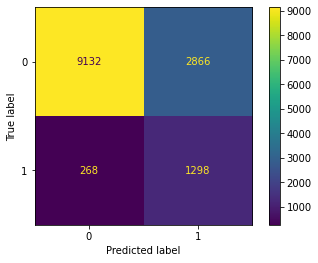

In [ ]:
metrics.plot_confusion_matrix(modelo, X_test_prep, y_test);

## <font color="#333F49">**Matriz de confusión** <font>

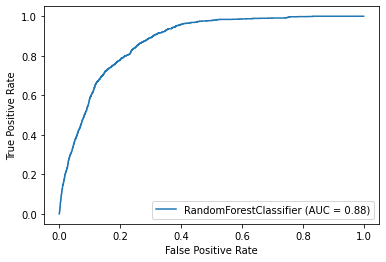

In [ ]:
metrics.plot_roc_curve(modelo, X_test_prep, y_test);

## <font color="#333F49">**Métricas** <font>

In [ ]:
reporte = metrics.classification_report(y_test, y_pred)
print(reporte)

              precision    recall  f1-score   support

           0       0.97      0.76      0.85     11998
           1       0.31      0.83      0.45      1566

    accuracy                           0.77     13564
   macro avg       0.64      0.79      0.65     13564
weighted avg       0.90      0.77      0.81     13564



**El modelo inicial es capaz de predecir correctamente un 77% de las observaciones del conjunto de datos de prueba**

## <font color="#333F49">**Podado del árbol - pruning** <font>

### ¿En qué consiste el pruning?

Identificar la profundidad óptima en la que se consigue reducir la varianza y aumentar la capacidad predictiva del modelo

In [ ]:
param_grid = {"ccp_alpha":np.linspace(0, 5, 10)}

### Búsqueda por validación cruzada

In [ ]:
grid = GridSearchCV(estimator = RandomForestClassifier(max_depth = None,
                                                       min_samples_split = 2,
                                                       min_samples_leaf  = 1,
                                                       random_state      = 123),
                    param_grid = param_grid,
                    scoring    = 'recall',
                    cv         = 10,
                    refit      = True,
                    return_train_score = True)

In [ ]:
grid.fit(X_train_prep, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=123),
             param_grid={'ccp_alpha': array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ])},
             return_train_score=True, scoring='recall')

### Graficando el resultado 

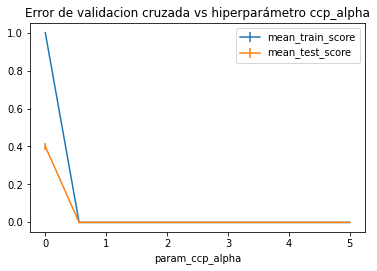

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

### Mejor valor encontrado

In [ ]:
grid.best_params_

{'ccp_alpha': 0.0}

### Modelo final

In [ ]:
modelo_final = grid.best_estimator_


### Predicción y evaluación del modelo final

In [ ]:
y_pred_final = modelo_final.predict(X_test_prep)

### Matriz de confusión

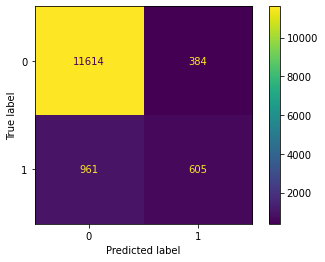

In [ ]:
metrics.plot_confusion_matrix(modelo_final, X_test_prep, y_test);

### Métricas

In [ ]:
reporte = metrics.classification_report(y_test, y_pred_final)
print(reporte)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11998
           1       0.61      0.39      0.47      1566

    accuracy                           0.90     13564
   macro avg       0.77      0.68      0.71     13564
weighted avg       0.89      0.90      0.89     13564



Con el **pruning** hemos ganado en exactitud, pasado de un 77% a un 90%, **pero**, no es menos cierto que, con este proceso, **perdemos bastante en exhaustividad**. 

## <font color="#333F49">**Importancia de las variables del vector de entrada** <font> 

Dado el descenso en la **exhaustividad** del modelo implementado a partir del proceso de pruning, nos centramos en la importancia del modelo inicial

In [ ]:
print("Importancia de las variables en el modelo")
print("-----------------------------------------")
importancia_variables = pd.DataFrame({'variable': labels.tolist(),
                                      'importancia': modelo.feature_importances_})

importancia_variables.sort_values('importancia', ascending=False)

Importancia de las variables en el modelo
-----------------------------------------


,variable,importancia
26,duracion,0.439651
4,canalcontacto_others,0.112068
28,contactoanterior,0.081802
29,contactosprevios,0.072259
23,hipoteca,0.059385
3,canalcontacto_cellular,0.054511
18,edad,0.039810
22,saldoanual,0.020781
14,mes_may,0.019660
13,mes_mar,0.016347


# **Conclusiones**: <font color="#0A66C2"><h10>**Detalles** <font> 

El modelo de Randon Forest Classifier implementado con scikit - learn, nos marca como la variable duración tiene una gran importancia en el éxito de la campaña.

<font color="#0A66C2"><h10>**Destacamos a nivel de negocio las siguientes** <font>:
- **No logramos mejorar la Exhaustividad .** 


- **Relevancia de la variable duración del contacto.** 
Formar al equipo de ventas en aspectos que tengan que ver con los tiempos y ritmos de contacto, así como el impacto del mismo en la contratación.

- **Mejorar la calidad de los datos.** 
La categoría que hemos definido como "otros" (ni móvil ni teléfono) es la segunda variable con mayor relavancia en la predicción de la contratación. Se hace necesario trabajar una clara segmentación de los y las clientas en función de los canales de relación y, sobre todo, de contratación de productos


